# Brain Tumour Detection

This code is for training and evaluating the VGG16 (CNN model) for brain tumour detection on MRI images. The process involves several steps: data preparation, image preprocessing, model training, model performance evaluation and prediction on your own image.

The dataset for training and testing the model was taken from the Kaggle platform (https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection/data). And has the following characteristics:
- **Data Type**: MRI images
- **Dataset Size**: 253 files
- **File Formats**: JPG, PNG, JPEG
- **Image Sizes**: Varying
- **Categories**:
  - Tumor present (yes): 155 images
  - No tumor (no): 98 images

### Install the dataset from Kaggle

In [10]:
! pip install kaggle

In [11]:
! kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection

Dataset URL: https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection
License(s): copyright-authors



  0%|          | 0.00/15.1M [00:00<?, ?B/s]
  7%|6         | 1.00M/15.1M [00:00<00:07, 1.88MB/s]
 20%|#9        | 3.00M/15.1M [00:00<00:02, 5.32MB/s]
 46%|####6     | 7.00M/15.1M [00:00<00:00, 12.7MB/s]
 73%|#######2  | 11.0M/15.1M [00:00<00:00, 19.0MB/s]
 93%|#########2| 14.0M/15.1M [00:01<00:00, 20.9MB/s]
100%|##########| 15.1M/15.1M [00:01<00:00, 15.0MB/s]


In [16]:
import zipfile

with zipfile.ZipFile("brain-mri-images-for-brain-tumor-detection.zip", "r") as zip_ref:
    zip_ref.extractall(".")

### Package and library import

In [24]:
import pickle

from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, confusion_matrix

from COV_brain_tumor_detection import (
    create_data_generators,
    TEST_DIR,
    TRAIN_DIR,
    VAL_DIR,
    create_model,
    preprocess_images,
    load_data,
    split_data,
    clean_directory,
    save_new_images,
    plot_confusion_matrix,
    plot_data_distribution,
    plot_model_performance,
    plot_samples, plot_precision_recall, plot_roc_curve
)

### Preparing data

In [25]:
split_data("brain_tumor_dataset")

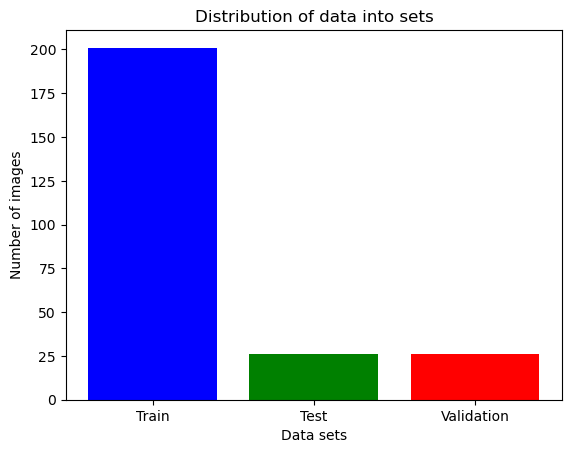

In [26]:
plot_data_distribution()

In [27]:
X_train, y_train, labels = load_data(TRAIN_DIR)
X_test, y_test, _ = load_data(TEST_DIR)
X_val, y_val, _ = load_data(VAL_DIR)

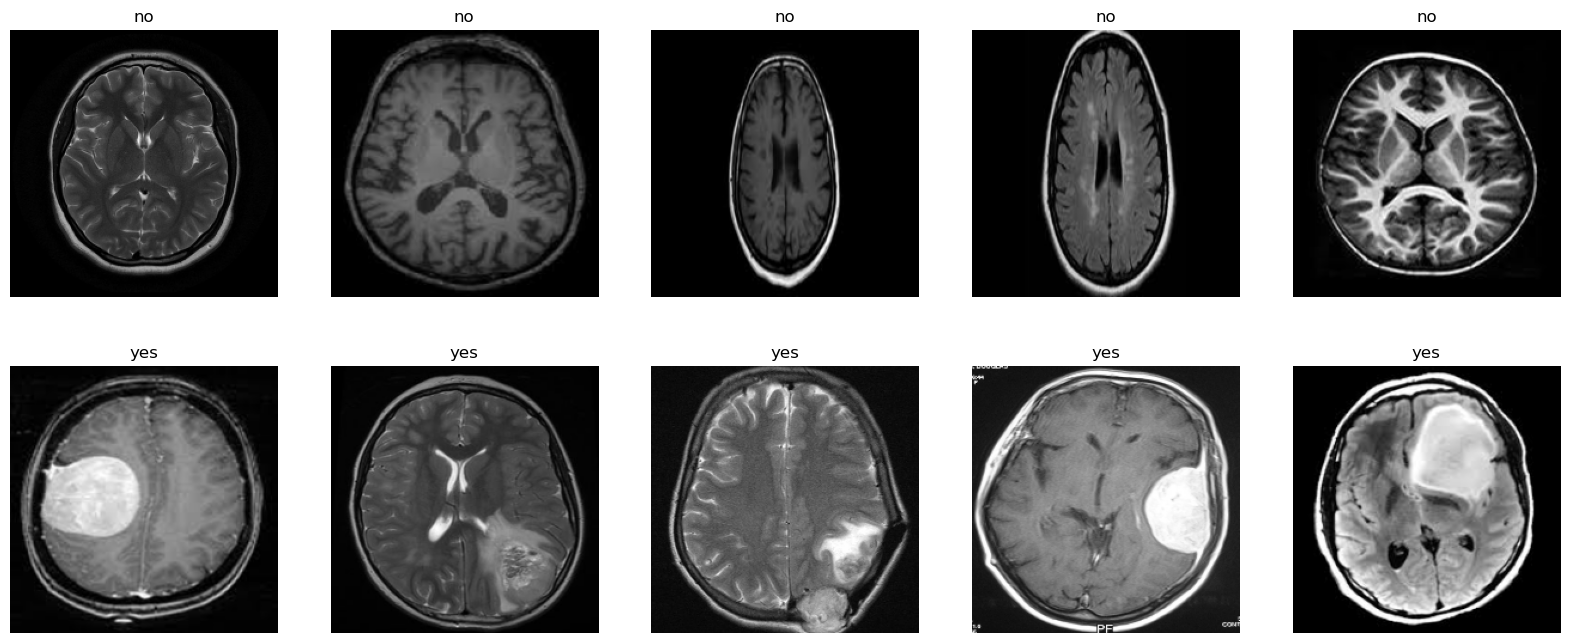

In [28]:
plot_samples(X_train, y_train, labels)

### Image preprocessing

In [29]:
X_train_prep = preprocess_images(X_train)
X_val_prep = preprocess_images(X_val)
X_test_prep = preprocess_images(X_test)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

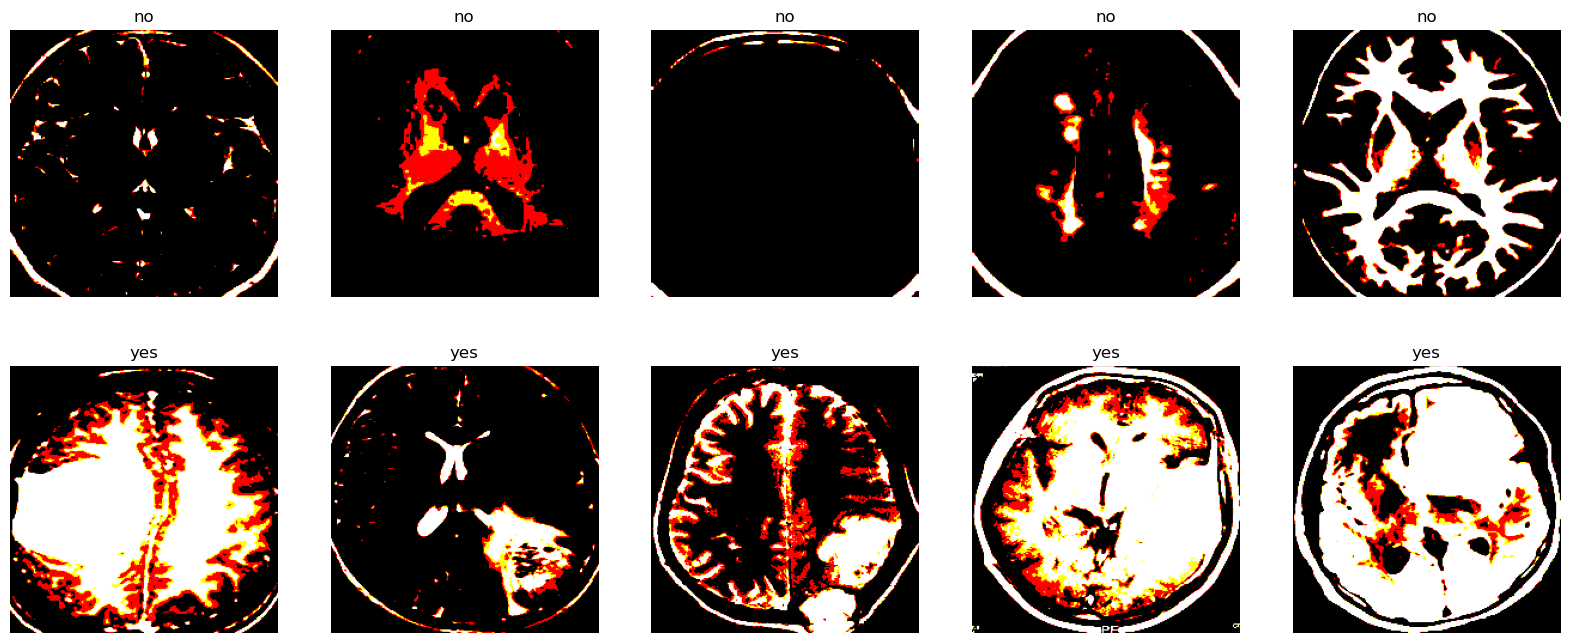

In [30]:
plot_samples(X_train_prep, y_train, labels)

### Saving and clearing data

In [31]:
save_new_images(X_train_prep, y_train, folder_name=TRAIN_DIR)
save_new_images(X_val_prep, y_val, folder_name=VAL_DIR)
save_new_images(X_test_prep, y_test, folder_name=TEST_DIR)

In [32]:
clean_directory(TRAIN_DIR)
clean_directory(VAL_DIR)
clean_directory(TEST_DIR)

### Model creation and training

In [11]:
model = create_model()

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dropout (Dropout)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 1)                 25089     
                                                                 
Total params: 14,739,777
Trainable params: 25,089
Non-trainable params: 14,714,688
_________________________________________________________________


In [13]:
train_generator, validation_generator = create_data_generators()

Found 201 images belonging to 2 classes.
Found 26 images belonging to 2 classes.


In [23]:
# history = model.fit(
#     train_generator,
#     steps_per_epoch=7,
#     epochs=30,
#     validation_data=validation_generator,
#     validation_steps=2,
#     callbacks=[EarlyStopping(monitor="val_accuracy", mode="max", patience=6)],
# )
# 
# model.save('cnn-vgg16.h5')
# 
# with open("model_history.pkl", "wb") as file_pi:
#     pickle.dump(history.history, file_pi)

Epoch 1/30
7/7 [==============================] - 33s 5s/step - loss: 5.8995 - accuracy: 0.5721 - val_loss: 2.2174 - val_accuracy: 0.6923
Epoch 2/30
7/7 [==============================] - 31s 4s/step - loss: 1.7538 - accuracy: 0.7512 - val_loss: 1.1108 - val_accuracy: 0.8077
Epoch 3/30
7/7 [==============================] - 31s 4s/step - loss: 1.8988 - accuracy: 0.7512 - val_loss: 2.2763 - val_accuracy: 0.6538
Epoch 4/30
7/7 [==============================] - 39s 5s/step - loss: 2.3524 - accuracy: 0.7313 - val_loss: 1.2193 - val_accuracy: 0.8462
Epoch 5/30
7/7 [==============================] - 35s 5s/step - loss: 1.2776 - accuracy: 0.7960 - val_loss: 1.0772 - val_accuracy: 0.8077
Epoch 6/30
7/7 [==============================] - 35s 5s/step - loss: 1.7221 - accuracy: 0.8109 - val_loss: 1.7606 - val_accuracy: 0.8077
Epoch 7/30
7/7 [==============================] - 32s 5s/step - loss: 1.5059 - accuracy: 0.7960 - val_loss: 1.6681 - val_accuracy: 0.8077
Epoch 8/30
7/7 [==================

### Model evaluation

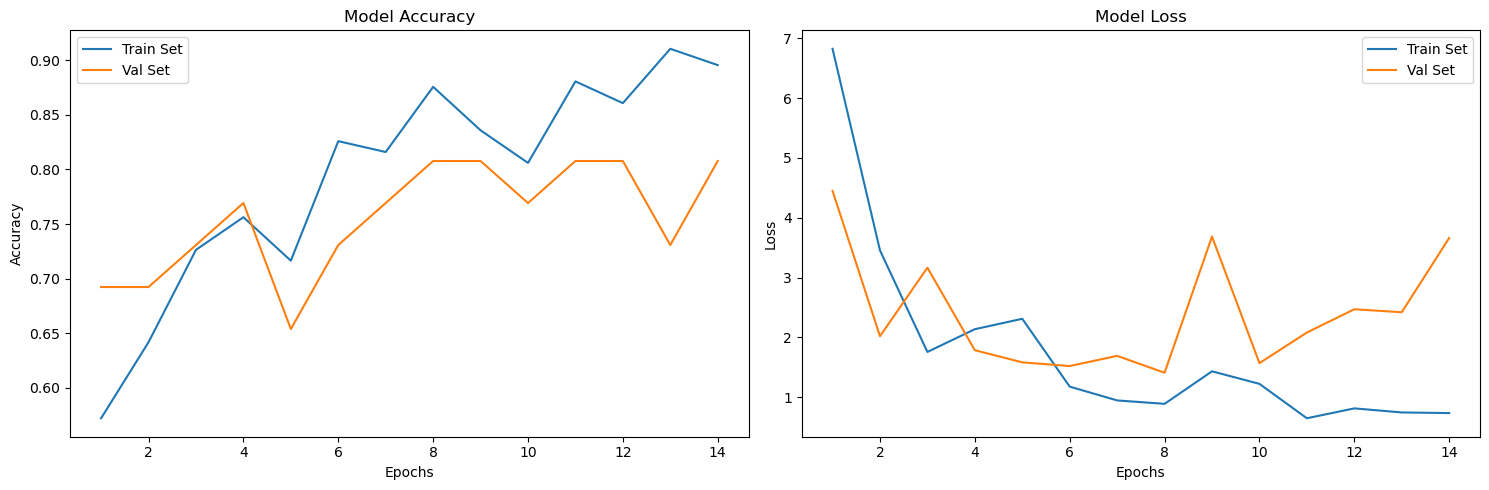

In [24]:
with open("COV_brain_tumor_detection/model_history.pkl", "rb") as file_pi:
    loaded_history = pickle.load(file_pi)
    
plot_model_performance(loaded_history)

In [25]:
predictions_test = [1 if x > 0.5 else 0 for x in model.predict(X_test_prep)]

1/1 [==============================] - 4s 4s/step


In [26]:
accuracy = accuracy_score(y_test, predictions_test)
print("Test Accuracy = %.2f" % accuracy)

Test Accuracy = 0.73


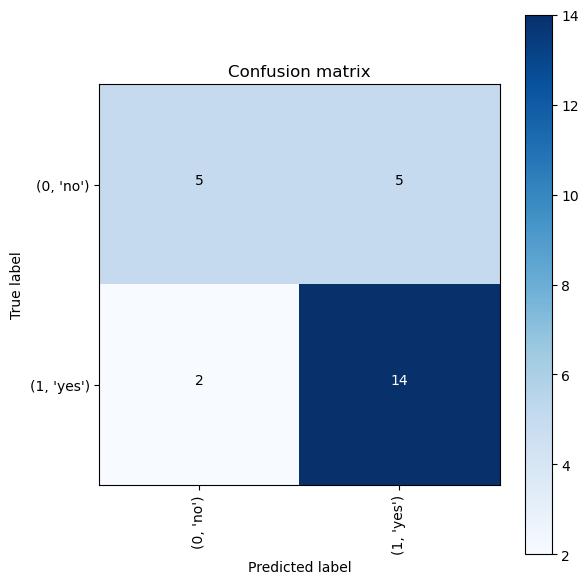

In [27]:
confusion_mtx = confusion_matrix(y_test, predictions_test)
plot_confusion_matrix(confusion_mtx, classes=list(labels.items()), normalize=False)

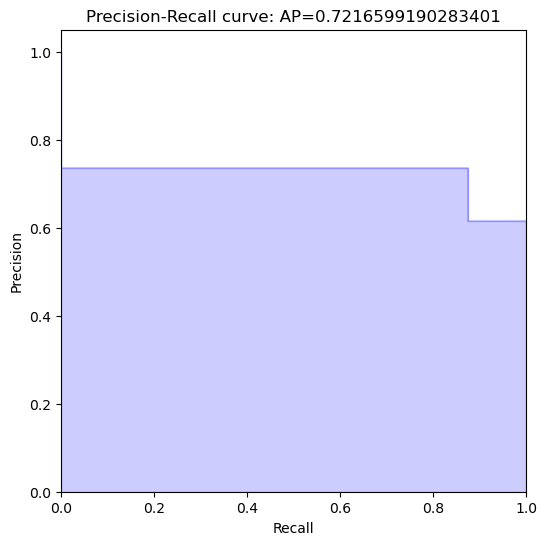

In [28]:
plot_precision_recall(y_test, predictions_test)

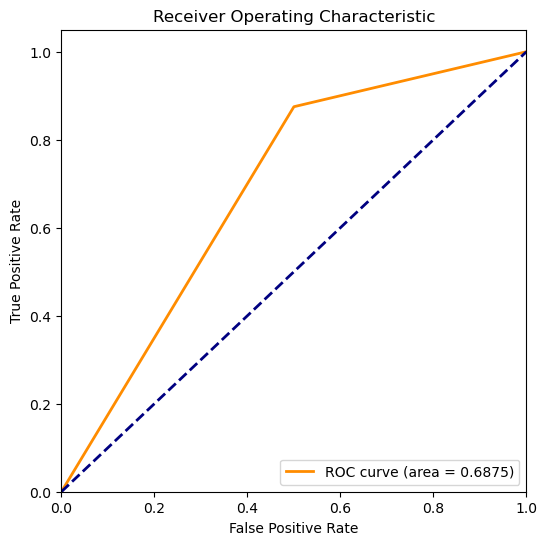

In [29]:
plot_roc_curve(y_test, predictions_test)

## Example of testing the model on personal image

In [1]:
import numpy as np

from PIL import Image
from keras.saving.save import load_model

In [2]:
model = load_model('COV_brain_tumor_detection/cnn-vgg16.h5')

In [3]:
def predict_tumor(img_path):
    img = Image.open(img_path)
    img = img.resize((224, 224))
    img_array = np.array(img)
    img_tensor = np.expand_dims(img_array, axis=0)
    img_tensor = img_tensor.astype('float32') / 255.0

    prediction = model.predict(img_tensor)
    
    if prediction[0][0] > 0.5:
        return "The tumour was found"
    else:
        return "No tumour was found"

In [4]:
image_path = 'yes_tumor_example.jpg'

In [5]:
result = predict_tumor(image_path)
print(result)

1/1 [==============================] - 1s 681ms/step
The tumour was found
